In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Fertilizer Prediction.csv')

In [3]:
data.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [5]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

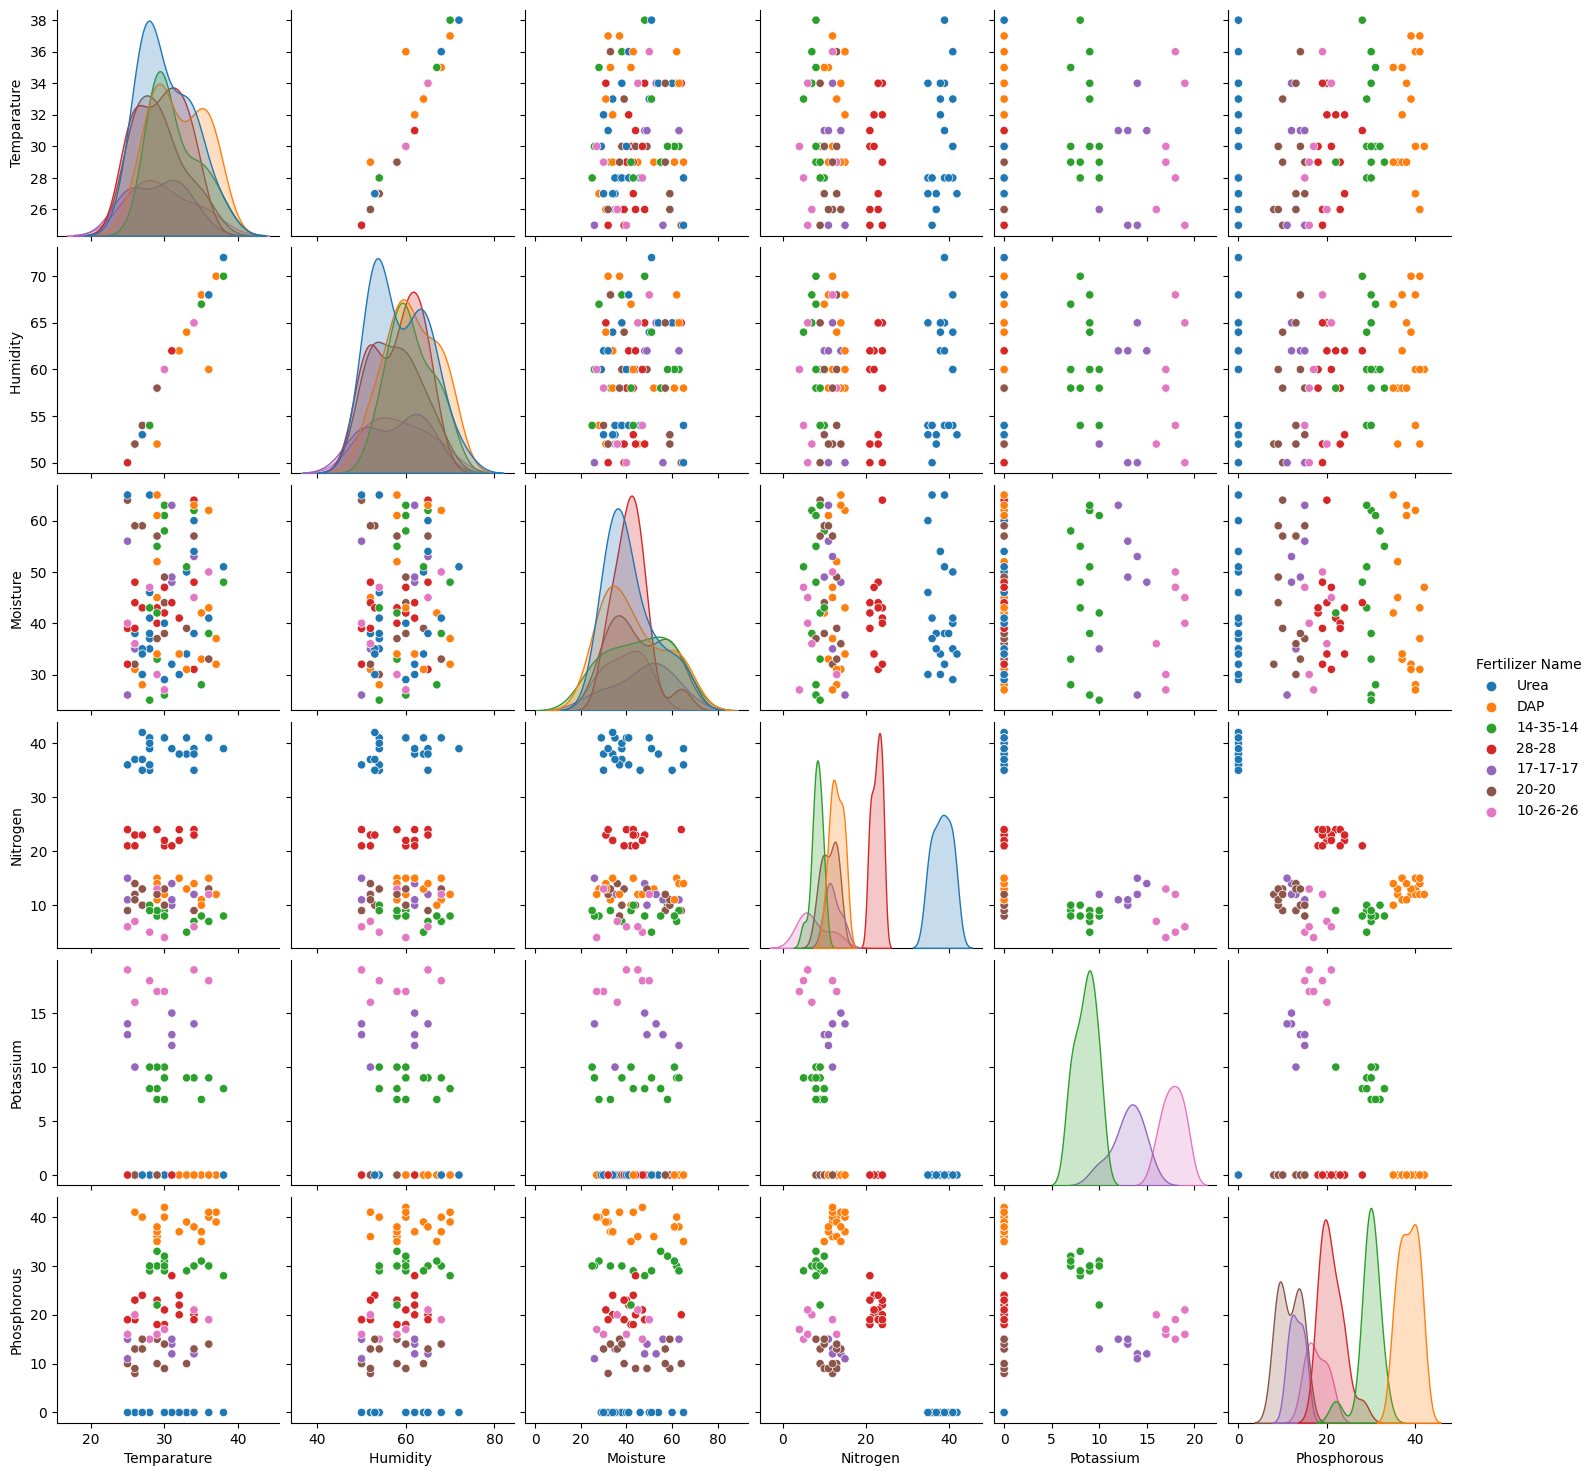

In [52]:
sns.pairplot(data,hue='Fertilizer Name')

In [6]:
intFeat = data[['Temparature', 'Humidity ', 'Moisture','Nitrogen', 'Potassium', 'Phosphorous']]
objFeat = data[['Crop Type','Soil Type','Fertilizer Name']]

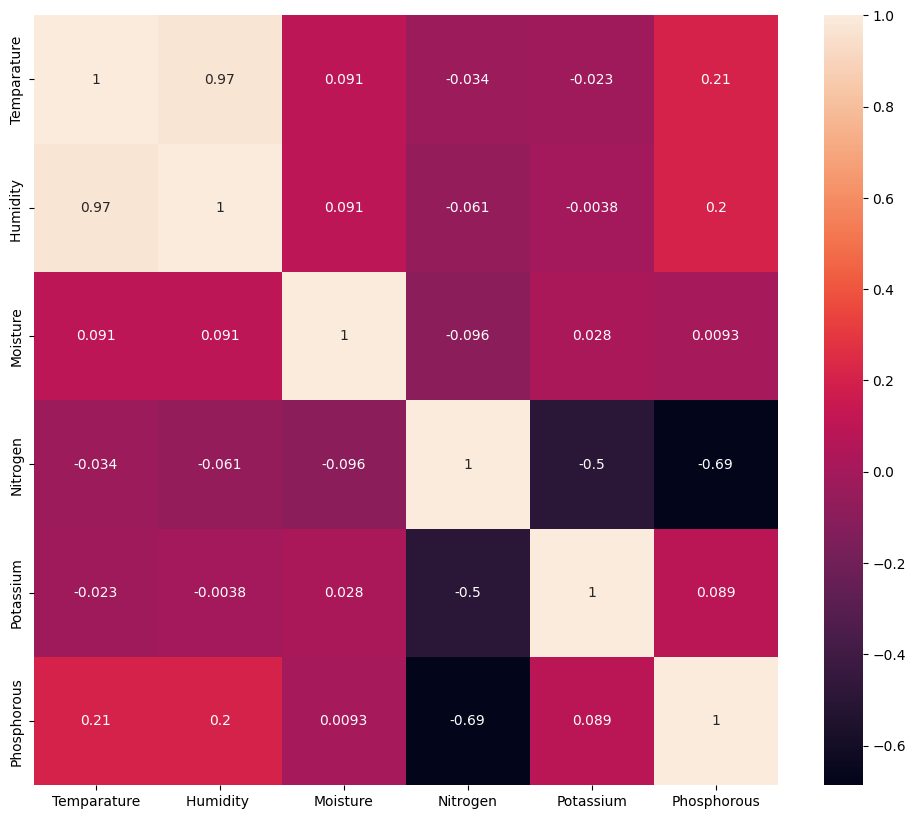

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(intFeat.corr(),annot=True)
plt.show()

In [7]:
intFeat

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,26,52,38,37,0,0
1,29,52,45,12,0,36
2,34,65,62,7,9,30
3,32,62,34,22,0,20
4,28,54,46,35,0,0
...,...,...,...,...,...,...
94,25,50,32,24,0,19
95,30,60,27,4,17,17
96,38,72,51,39,0,0
97,36,60,43,15,0,41


In [8]:
objFeat

,Crop Type,Soil Type,Fertilizer Name
0,Maize,Sandy,Urea
1,Sugarcane,Loamy,DAP
2,Cotton,Black,14-35-14
3,Tobacco,Red,28-28
4,Paddy,Clayey,Urea
...,...,...,...
94,Pulses,Clayey,28-28
95,Tobacco,Red,10-26-26
96,Wheat,Loamy,Urea
97,Millets,Sandy,DAP


In [9]:
objFeat['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64

In [10]:
objFeat['Soil Type'].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

In [11]:
oneObjFeat = pd.get_dummies(objFeat[['Crop Type','Soil Type']])

In [12]:
horizontal_concat = pd.concat([intFeat, oneObjFeat], axis=1)

In [13]:
horizontal_concat

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Crop Type_Barley,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,...,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy
0,26,52,38,37,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,29,52,45,12,0,36,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,34,65,62,7,9,30,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,32,62,34,22,0,20,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,28,54,46,35,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
95,30,60,27,4,17,17,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
96,38,72,51,39,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
97,36,60,43,15,0,41,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Temparature


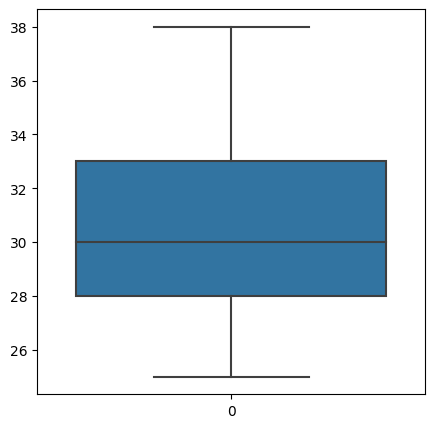

Humidity 


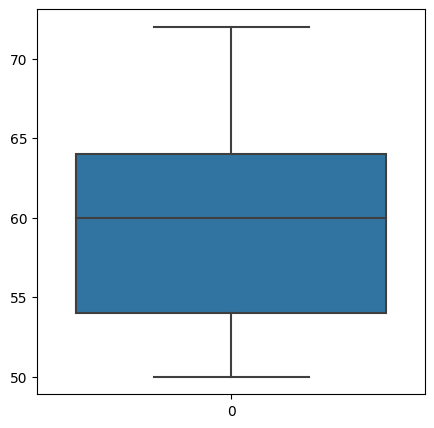

Moisture


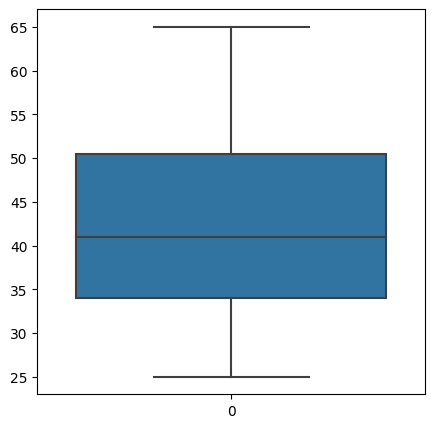

Nitrogen


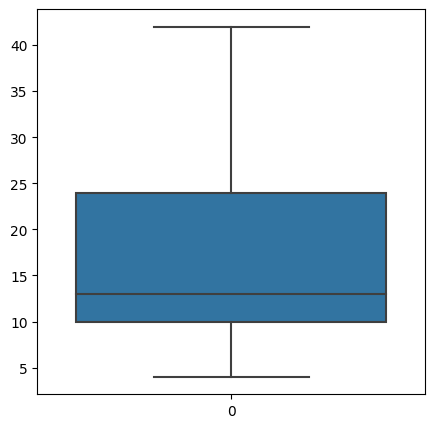

Potassium


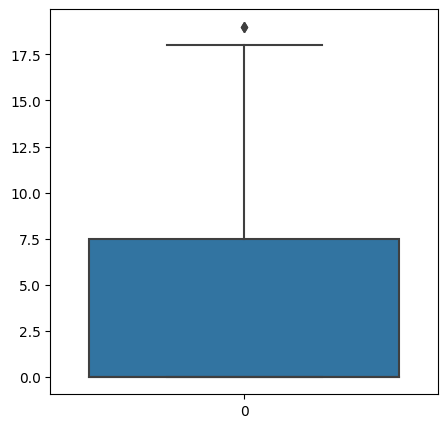

Phosphorous


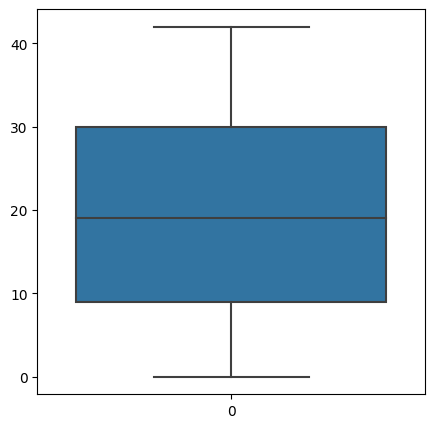

In [14]:
for col in intFeat.columns:
  plt.figure(figsize=(5,5))
  print(col)
  sns.boxplot(intFeat[col])
  plt.show()

In [15]:
X = horizontal_concat
Y = data[['Fertilizer Name']]

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.25,random_state=11)

In [17]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
set(Ytest['Fertilizer Name'])

{'10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP', 'Urea'}

In [18]:
from lightgbm import LGBMClassifier

In [19]:
lgbm = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100)
lgbm = lgbm.fit(Xtrain,Ytrain)
ypred = lgbm.predict(Xtest)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

<Axes: >

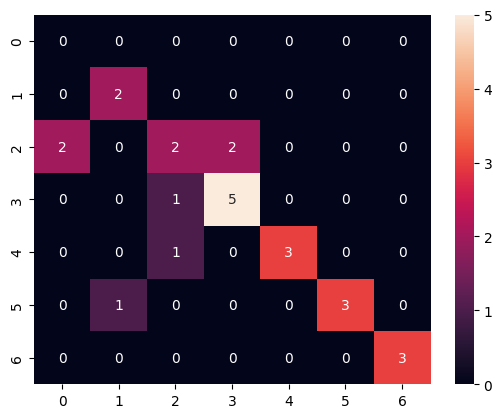

In [22]:
sns.heatmap(confusion_matrix(ypred,Ytest),annot=True)

In [32]:
f1_score(ypred,Ytest,average='weighted')

0.738901098901099

In [36]:
cols = intFeat.columns

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(intFeat),columns=cols)
df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,-1.229084,-1.230737,-0.462064,1.567539,-0.584910,-1.387607
1,-0.368145,-1.230737,0.162128,-0.598658,-0.584910,1.297209
2,1.066752,1.006492,1.678023,-1.031898,0.970777,0.849740
3,0.492793,0.490209,-0.818745,0.267821,-0.584910,0.103958
4,-0.655125,-0.886548,0.251298,1.394244,-0.584910,-1.387607
...,...,...,...,...,...,...
94,-1.516063,-1.574926,-0.997086,0.441117,-0.584910,0.029379
95,-0.081166,0.146020,-1.442938,-1.291841,2.353610,-0.119777
96,2.214670,2.211154,0.697150,1.740835,-0.584910,-1.387607
97,1.640711,0.146020,-0.016213,-0.338715,-0.584910,1.670100


In [42]:
horizontal_concat = pd.concat([df, oneObjFeat], axis=1)
X = horizontal_concat
Y = data[['Fertilizer Name']]
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.25,random_state=11)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


<Axes: >

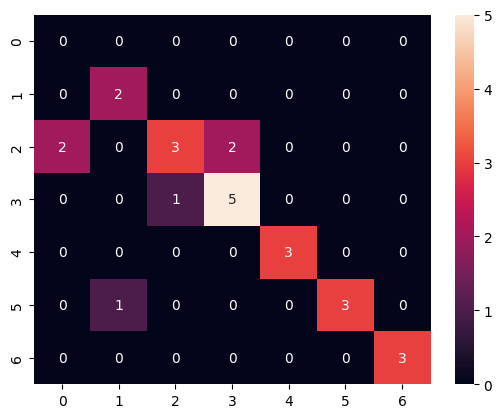

In [43]:
lgbm = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100)
lgbm = lgbm.fit(Xtrain,Ytrain)
ypred = lgbm.predict(Xtest)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
sns.heatmap(confusion_matrix(ypred,Ytest),annot=True)

In [44]:
f1_score(ypred,Ytest,average='weighted')

0.7784855144855145

!pip install catboost

In [ ]:
!pip install catboost

In [46]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()

In [47]:
cbc = cbc.fit(Xtrain,Ytrain)

Learning rate set to 0.069287
0:	learn: 1.8662056	total: 47.7ms	remaining: 47.7s
1:	learn: 1.7601172	total: 48.4ms	remaining: 24.1s
2:	learn: 1.7084825	total: 49.4ms	remaining: 16.4s
3:	learn: 1.6460891	total: 50.4ms	remaining: 12.6s
4:	learn: 1.5797077	total: 51.5ms	remaining: 10.3s
5:	learn: 1.5292794	total: 52.6ms	remaining: 8.72s
6:	learn: 1.4716159	total: 54.3ms	remaining: 7.71s
7:	learn: 1.4285106	total: 56ms	remaining: 6.94s
8:	learn: 1.3774829	total: 57ms	remaining: 6.28s
9:	learn: 1.3312825	total: 58ms	remaining: 5.75s
10:	learn: 1.2936457	total: 59ms	remaining: 5.3s
11:	learn: 1.2602048	total: 60ms	remaining: 4.94s
12:	learn: 1.2195776	total: 61.1ms	remaining: 4.64s
13:	learn: 1.1942483	total: 62.1ms	remaining: 4.37s
14:	learn: 1.1564879	total: 63.9ms	remaining: 4.19s
15:	learn: 1.1270034	total: 65.5ms	remaining: 4.03s
16:	learn: 1.0810921	total: 66.7ms	remaining: 3.85s
17:	learn: 1.0347457	total: 67.6ms	remaining: 3.69s
18:	learn: 1.0126244	total: 68.6ms	remaining: 3.54s
19:

In [48]:
ypred = cbc.predict(Xtest)

<Axes: >

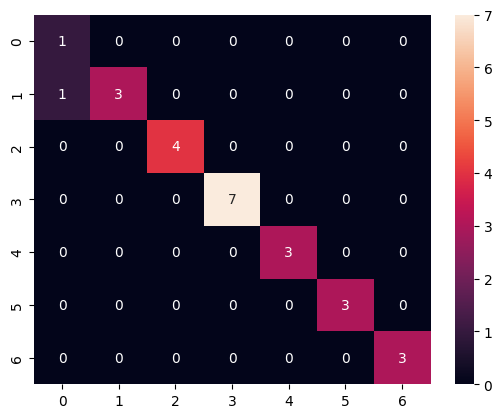

In [49]:
sns.heatmap(confusion_matrix(ypred,Ytest),annot=True)

In [51]:
f1_score(ypred,Ytest,average='weighted')

0.9638095238095238